In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append(".")
import post
import importlib
importlib.reload(post)

<module 'post' from 'C:\\Users\\flash\\Project\\Yet-Another-Openpose-Implmentation\\dev\\post.py'>

In [3]:
HEIGHT=46
WIDTH=46
y_grid = tf.linspace(0.0, 1.0, HEIGHT)
x_grid = tf.linspace(0.0, 1.0, WIDTH)
yy, xx = tf.meshgrid(y_grid, x_grid, indexing='ij')  # indexing is a must, otherwise, it's just bizzare!
grid = tf.stack((yy, xx), axis=-1)


def keypoints_layer(kpts_layer):
    """This transforms a single layer of keypoints (such as 3 keypoints of type 'right shoulder')
    the keypoint_distance creates an array of the distances from each keypoint
    and this reduces them to a single array by the  of the distances.
    :param kpts_layer must be a tf.Tensor of shape (n,3)"""
    layer_dists = tf.map_fn(keypoint_distance, kpts_layer)
    all_dists=tf.math.reduce_min(layer_dists, axis=0)
    raw = tf.exp((-(all_dists ** 2) / 0.1))
    return raw

def keypoint_distance(kpt):
    """This transforms a single keypoint into an array of the distances from the keypoint
    :param kpt must be tf.Tensor of shape (x,y,a) where a is either 0,1,2 for missing,invisible and visible"""
    if kpt[2] == tf.constant(0.0):
        return tf.ones((HEIGHT, WIDTH), dtype=tf.float32)  # maximum distance incase of empty kpt, not ideal but meh
    else:
        ortho_dist = grid - kpt[0:2]
        return tf.linalg.norm(ortho_dist, axis=-1)

In [4]:
kpts=np.array([
        [0.3,0.3,2],
        [0.7,0.7,2],
        ],dtype=np.float32)
sample=keypoints_layer(kpts)

input = sample > 0.5
input=input.numpy()

In [5]:
islands,head=post.mark_islands(input)



In [6]:
%timeit post.mark_islands(input)


43.2 µs ± 3.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


{1: None,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: None,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30}

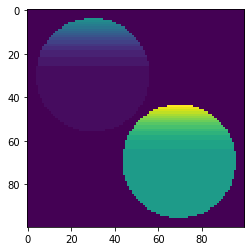

In [10]:
plt.imshow(islands)
head